French Road Accidents
==============
## Exploratory analysis

**Authors** (alphabetically):
> - Pablo Galán de Anta
> - Jennifer Pohlsen
> - Ilinca Suciu

**Project supervisor**: Lucas Varela - DataScientest

**Date**: 2023-12-08

# Table of Contents
1. [Introduction](#1.-Introduction)
2. [Data Preparation](#2.-Dataset-reconstruction)
3. [Missing Values](#3.-Missing-Values)
4. [Data Cleaning](#4.-Preliminary-Data-Cleaning)
5. [Results](#5.-Results)

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define standard font sizes for plots
t_font = 16 # title font
xy_font = 14 # x- and y-axis label font
tx_font = 12 # tick label font

# 1. Introduction

In its original form, the data was stored as .csv files, where each file was a combination of **year** x **table type**. The raw datasets are publicly available on the [website of the French government](
https://www.data.gouv.fr/en/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2022/).

The four types of tables are :  

| Table Type    | Description                                                                                            |
|--------------|--------------------------------------------------------------------------------------------------------|
| **caracteristiques** | This file contains characteristic information about the accident, such as time, place, weather, and lighting conditions. |
| **lieux**           | This file contains more detailed information about the location of the accident, including obstacles hit, type of road or intersection, etc. |
| **vehicules**       | This file contains information about the vehicle(s) involved in the accident |
| **usagers**         | This file contains information about each person involved in the accident, such as age, location in the vehicle, etc. |

This research involved the comprehensive collection and analysis of all available accident data up to the study period, encompassing French records from 2005 to 2022.

Due to *GitHub file size restrictions*, the datasets had to be merged in the following order prior to this analysis:
> **Step 1.** concatenation by table type

> **Step 2.** sequential joins on the unique identifier 'Num_Acc'
and then accident entries (rows) were split into 20 datasets, each saved in one .csv file. 

In order to be able to work with the accident data, we must first re-construct the unprocessed merged dataset, containing data from all available years on all recorded variables.

# 2. Dataset reconstruction

In [2]:
# The subsequent code cells utilize a relative path to the data folder, assuming operation within the cloned repository.
# Adjust the path accordingly if working outside the repository.

# Define folder path and file names
path = "../data/merge_data/"   # Define the path to the data folder containing individual data files for merging.
prefix = "merge_parts_"   # Define the common prefix for the data files.
file_ids = range(1, 21)   # Generate a range of file IDs to be merged.
extension = '.csv'   # Specify the file extension for the data files.

# Iterate over the file IDs and merge the corresponding data files.
for ID in file_ids:
    # Construct the filename based on the prefix, file ID, and extension.
    filename = prefix + str(ID) + extension
    
    # Print a message indicating the processing of the current file.
    print('Processing', filename)
    
    # Read the data from the current file into a DataFrame.
    df_temp = pd.read_csv(path + filename, sep=',')

    # Merge the DataFrames based on the file ID.
    if ID == 1:
        df = df_temp
    else:
        df = pd.concat([df, df_temp])

# Display the head of the merged DataFrame.
df.head()

Processing merge_parts_1.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_2.csv
Processing merge_parts_3.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (30,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_4.csv
Processing merge_parts_5.csv
Processing merge_parts_6.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_7.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_8.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (30,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_9.csv
Processing merge_parts_10.csv
Processing merge_parts_11.csv
Processing merge_parts_12.csv
Processing merge_parts_13.csv
Processing merge_parts_14.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_15.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_16.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_17.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (8,12,24,28,33,34,48,54,56,57,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_18.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


Processing merge_parts_19.csv
Processing merge_parts_20.csv


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2887179231.py:19: DtypeWarning: Columns (24,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(path + filename, sep=',')


,Num_Acc,place,catu,severity,gender,trajet,secu,locp,actp,comp,...,agg,int,atm,col,com,adr,gps,lat,long,dep
0,200500000001,1.0,1.0,4.0,1.0,1.0,11.0,0.0,0.0,0.0,...,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590
1,200500000001,1.0,1.0,3.0,2.0,3.0,11.0,0.0,0.0,0.0,...,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590
2,200500000001,2.0,2.0,1.0,1.0,0.0,11.0,0.0,0.0,0.0,...,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590
3,200500000001,4.0,2.0,1.0,1.0,0.0,31.0,0.0,0.0,0.0,...,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590
4,200500000001,5.0,2.0,1.0,1.0,0.0,11.0,0.0,0.0,0.0,...,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590


# 3. Missing Values

Look at missing values for each variable.

In [3]:
#df.isna().any()

total_percent_missing = df.isna().sum() / len(df) * 100
total_percent_missing


Num_Acc           0.000000
place             5.708100
catu              1.088827
severity          1.088827
gender            1.088827
trajet            1.107360
secu             21.754414
locp              3.203268
actp              3.207057
comp              3.205406
birth_year        1.402424
num_veh           0.000000
id_vehicule_x    81.455456
secu1            81.455456
secu2            81.455456
secu3            81.455456
id_usager        90.399275
senc              4.766223
catv              4.752679
occ              18.526198
obs               4.799237
obsm              4.789370
choc              4.770012
manv              4.773726
id_vehicule_y    86.059347
motor            86.059347
Unnamed: 0        0.000000
catr              0.000075
voie              8.960251
v1               53.781390
v2               95.031716
circ              0.135020
nbv               0.236501
pr               38.883291
pr1              39.030654
vosp              0.240853
prof              0.168034
p

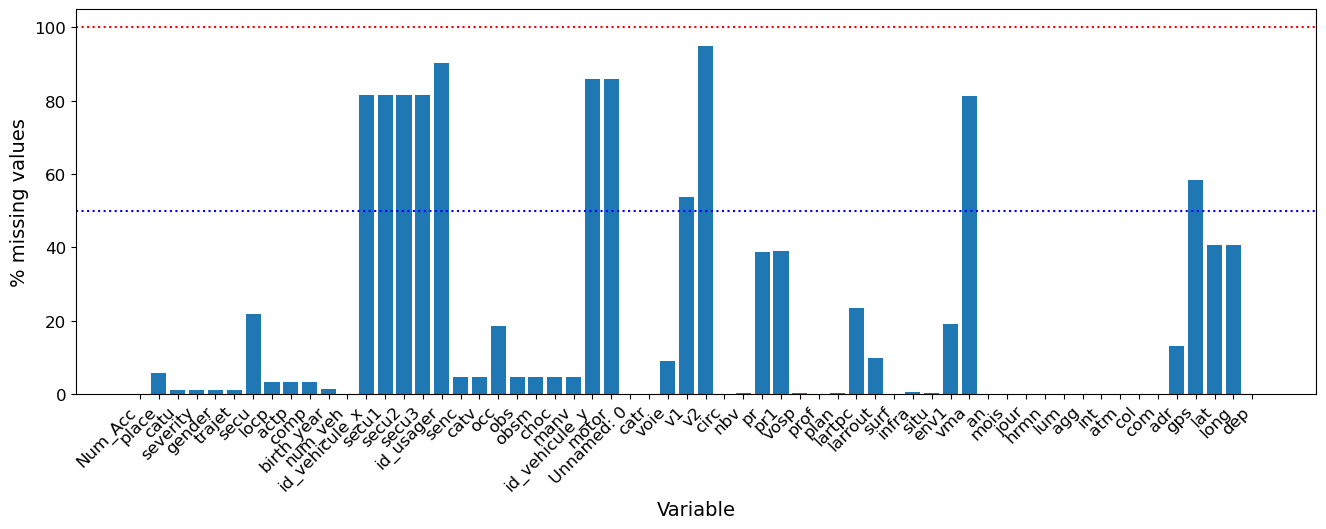

In [4]:
# Calculate yearly percentage of missing values
yearly_percent_missing = []
years = df['an'].unique()
for year in years:
  yearly_percent_missing.append(df[df['an'] == year].isna().sum() / len(df[df['an'] == year]) * 100)

# Create a bar plot, show it and save it in the repository
plt.figure(figsize=(16,5))
plt.bar(total_percent_missing.index, total_percent_missing.values)
plt.axhline(y=100, color='red', linestyle='dotted', label='Threshold at 100%')
plt.axhline(y=50, color='blue', linestyle='dotted', label='Threshold at 50%')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.xlabel("Variable", fontsize = xy_font)
plt.ylabel('% missing values', fontsize = xy_font)
plt.savefig("../plots/features_missing_values.png")

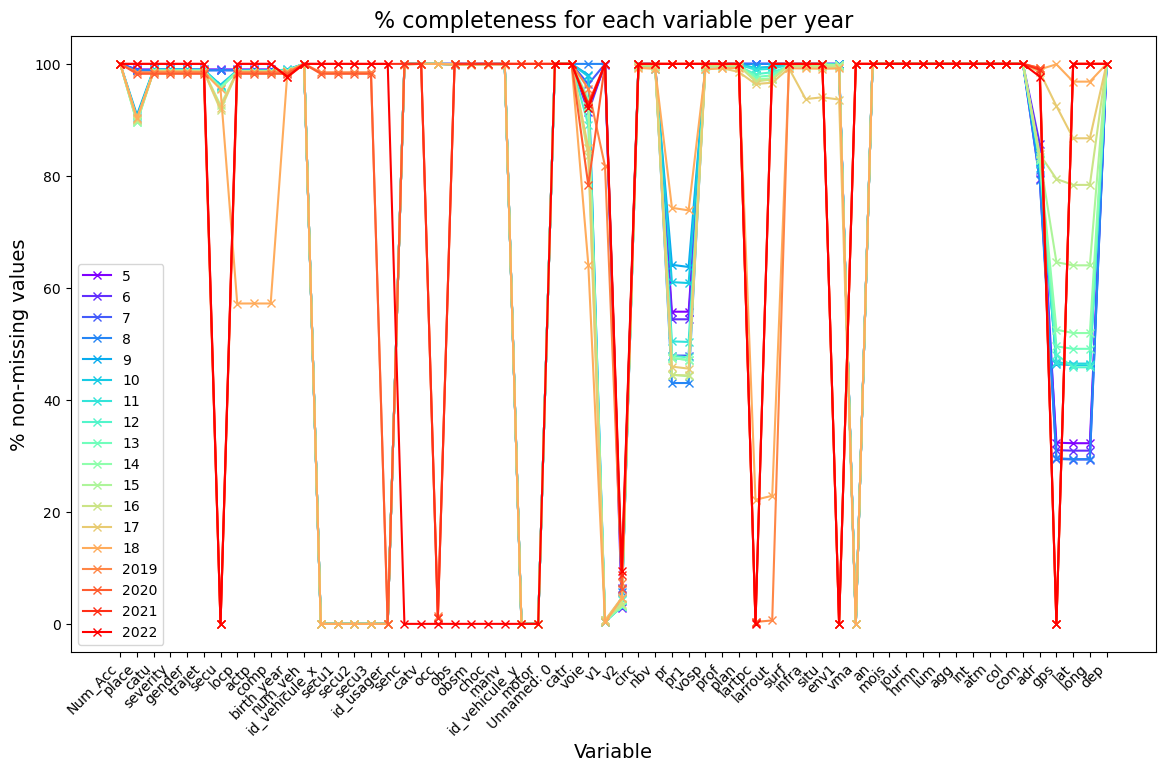

In [5]:
# Percentage of completness (= % non-missing variables)
plt.figure(figsize=(14,8))
n = len(years)
colors = plt.cm.rainbow(np.linspace(0,1,n))
for i in range(len(yearly_percent_missing)):
  plt.plot(yearly_percent_missing[i].index, 100 - yearly_percent_missing[i].values, 'x-', color=colors[i], label=years[i])

plt.legend(loc="best")
plt.xlabel("Variable", fontsize = xy_font)
plt.ylabel("% non-missing values", fontsize = xy_font)
plt.xticks(rotation=45, ha='right')
plt.title("% completeness for each variable per year", fontsize = t_font)
plt.savefig("../plots/features_percent_missing_values.png")

# 4. Preliminary Data Cleaning

In [6]:
# Rename columns to english names
df = df.rename(columns={'an': 'year', 'mois': 'month', 'jour': 'day', 'lum': 'lighting'})

# Dep and Com contain INSEE codes. For some Departments this includes letters, so it must be str
df['dep'] = df['dep'].astype(str)
df['com'] = df['com'].astype(str)

# These variables are encoded categories, should be int. Use Int64 to handle NaNs correctly.
df['atm'] = df['atm'].astype('Int64')
df['col'] = df['col'].astype('Int64')

# Convert time to string, remove :, fill with zeros
df['hrmn'] = df['hrmn'].astype(str)
df['hrmn'] = df['hrmn'].str.replace(':','')
df['hrmn'] = df['hrmn'].str.zfill(4)

# For atm and col, the value -1 means not known / not specified. Convert NaNs to -1.
df['atm'] = df['atm'].fillna(-1)
df['col'] = df['col'].fillna(-1)

# Correct years to be in a consistent format
years = {5:2005, 6:2006, 7:2007, 8:2008, 9:2009, 10:2010, 11:2011, 
         12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 17:2017, 18:2018,
         2019:2019, 2020:2020, 2021:2021, 2022:2022}
df['year'] = df['year'].replace(to_replace=years)
df.year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [7]:
# Create a datetime column. First add zeros to left of single-digit months/days
# I will delete these columns after I am finished
df['new_month'] = df['month'].astype(str)
df['new_month'] = df['new_month'].str.zfill(2)
df['new_day'] = df['day'].astype(str)
df['new_day'] = df['new_day'].str.zfill(2)

# Build date_time out of year, new_month, new_day, hrmn
df['date_time'] = df['year'].astype(str) + df['new_month'].astype(str) + df['new_day'].astype(str) + df['hrmn'].astype(str)
df['date_time'] = pd.to_datetime(df['date_time'], format="%Y%m%d%H%M")

# drop the temp columns, don't need them anymore
df = df.drop(['new_month', 'new_day'], axis=1)

df['weekday'] = df['date_time'].dt.weekday
df['weekday_name'] = df['date_time'].dt.day_name()

# 5. Results
### __Number of accidents vs time (hour, day, month)__

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


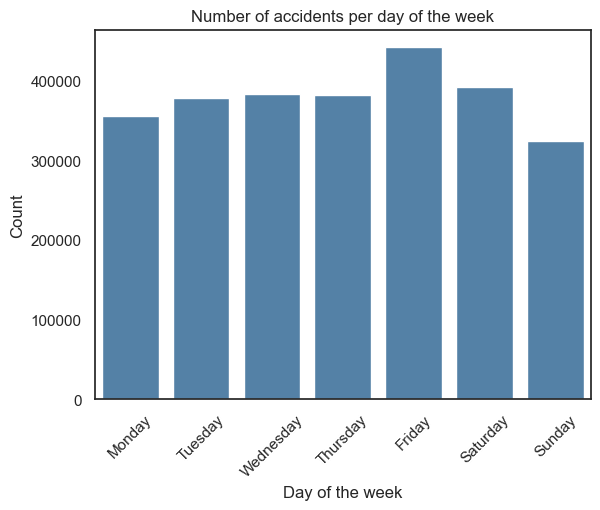

In [133]:
# Per day of the week
sns.set(style="white")
ax = sns.countplot(x=df['weekday_name'], 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='#4682B4')
plt.tick_params(axis='both', which='major')
plt.title("Number of accidents per day of the week")
plt.xticks(rotation=45)
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.savefig("../plots/num_acc_per_day.png", bbox_inches='tight', dpi = 150)


C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


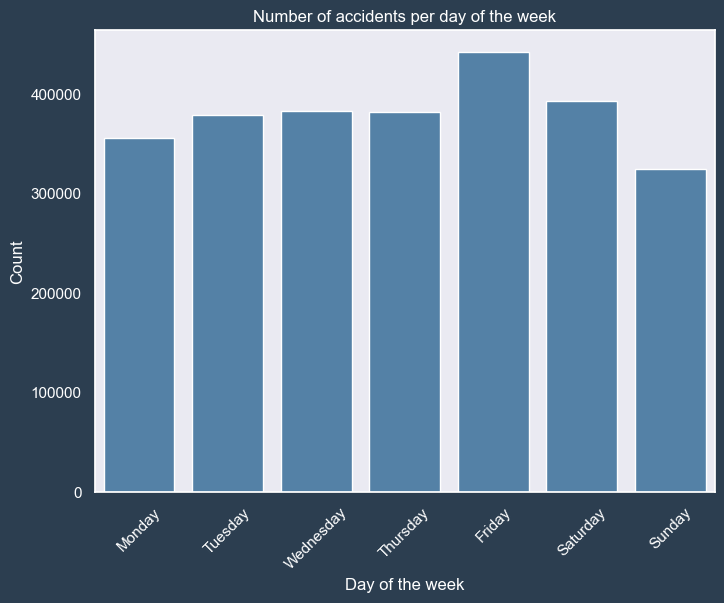

In [128]:
# Per day of the week - plot formatted for the Streamlit presentation
# Set the Seaborn dark style
sns.set(style="dark")

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.countplot(x=df['weekday_name'], 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='#4682B4')
plt.tick_params(axis='both', which='major')
plt.title("Number of accidents per day of the week", color='white')
plt.xticks(rotation=45, color='white')
plt.xlabel("Day of the week", color='white')
plt.ylabel("Count", color='white')

# Set a dark gray background color for the area with labels and title
fig.patch.set_facecolor('#2c3e50')  

# Set the text color for y-axis ticks
ax.tick_params(axis='y', colors='white')

plt.savefig("../plots/num_acc_per_day_streamlit.png", bbox_inches='tight', dpi = 150)


C:\Users\smara\AppData\Local\Temp\ipykernel_4724\933264598.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_year_day = df.groupby(['year', 'weekday_name'])['Num_Acc'].nunique().reset_index()
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seabor

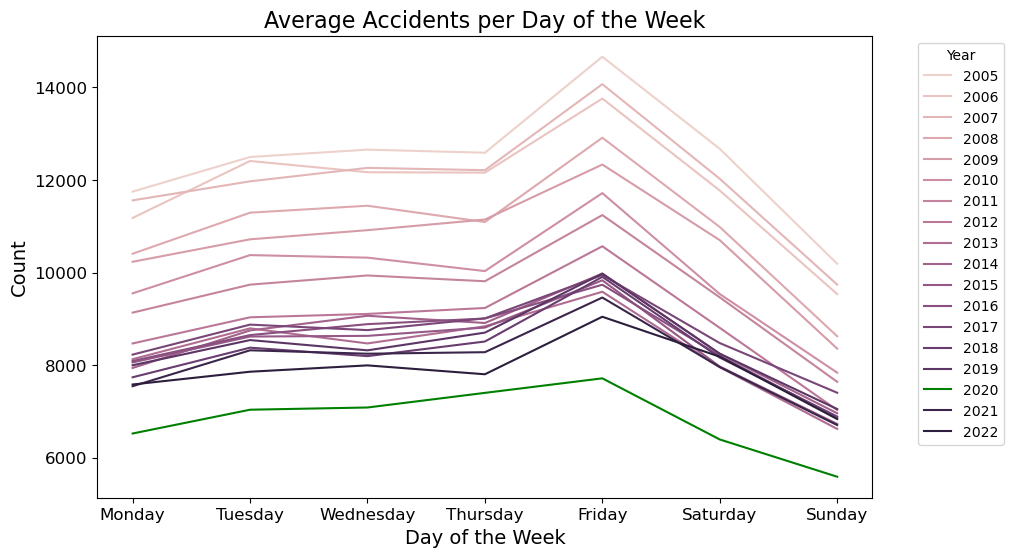

In [9]:
# Per day of the week, with yearly trends 
# Set the order of the days of the week in the DataFrame
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday_name'] = pd.Categorical(df['weekday_name'], categories=days_order, ordered=True)

# Group by year and weekday_name, calculate the number of unique accidents
accidents_per_year_day = df.groupby(['year', 'weekday_name'])['Num_Acc'].nunique().reset_index()

# Calculate yearly standard deviation
yearly_std = accidents_per_year_day.groupby('year')['Num_Acc'].std()

# Lineplot for average daily accidents with different lines for each year and yearly error bars
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    x='weekday_name',
    y='Num_Acc',
    hue='year',
    data=accidents_per_year_day,
    err_style="band",   # Add shaded error bands
    errorbar=None,            # Do not calculate the default confidence interval
    err_kws={'alpha': 0.2, 'yerr': yearly_std},  # Pass yearly_std for error bars
    sort=False          # To keep the days of the week in the specified order
)

# Set the color for the line corresponding to the year 2020 to green
ax.lines[accidents_per_year_day['year'].unique().tolist().index(2020)].set_color('green')

plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.title("Average Accidents per Day of the Week", fontsize = t_font)
plt.xlabel("Day of the Week", fontsize = xy_font)
plt.ylabel("Count", fontsize = xy_font)
plt.legend(list(years.values()), title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("../plots/yearly_num_acc_per_weekday.png")

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


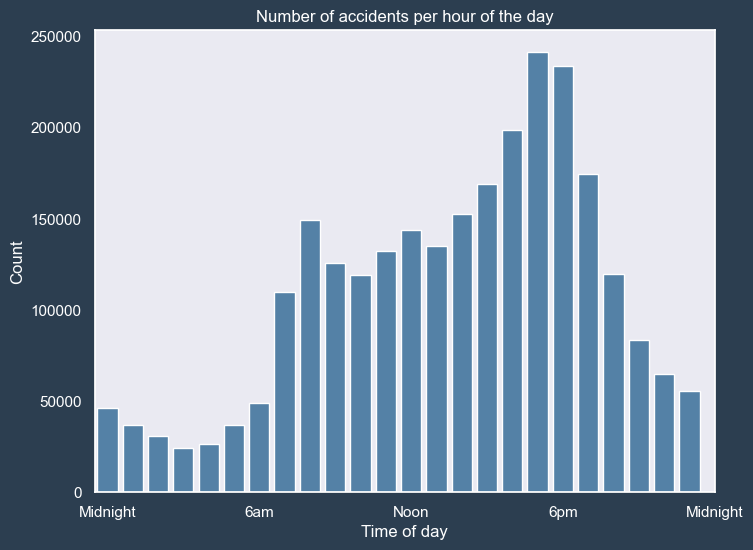

In [127]:
# Time of day - plot formatted for the Streamlit presentation
# Set the Seaborn dark style
sns.set(style="dark")

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Set the color for all bars to be suitable for a dark theme
sns.countplot(x=df['date_time'].dt.hour, color='#4682B4', ax=ax)  

# Modify x-axis tick labels to display hours of the day
plt.xticks([0, 6, 12, 18, 24], ['Midnight', '6am', 'Noon', '6pm', 'Midnight'], color='white')
plt.ylabel("Count", color='white')
plt.xlabel("Time of day", color='white')
plt.title("Number of accidents per hour of the day", color='white')

# Set a dark gray background color for the area with labels and title
fig.patch.set_facecolor('#2c3e50')  

# Set the text color for y-axis ticks
ax.tick_params(axis='y', colors='white')

# Save the plot
plt.savefig("../plots/num_acc_per_hour_streamlit.png")

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


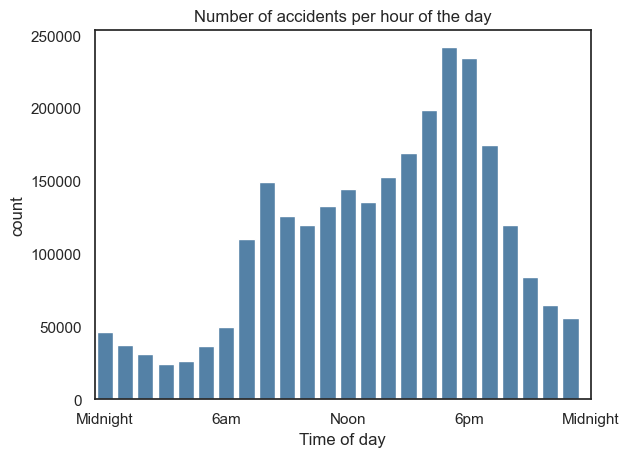

In [24]:
# Time of day
sns.set(style="white")
sns.countplot(x = df['date_time'].dt.hour, color='#4682B4')

# Modify x-axis tick labels to display hours of the day
plt.xticks([0, 6, 12, 18, 24], ['Midnight', '6am', 'Noon', '6pm', 'Midnight'])
plt.xlabel("Time of day")
plt.title("Number of accidents per hour of the day")
plt.savefig("../plots/num_acc_per_hour.png")

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


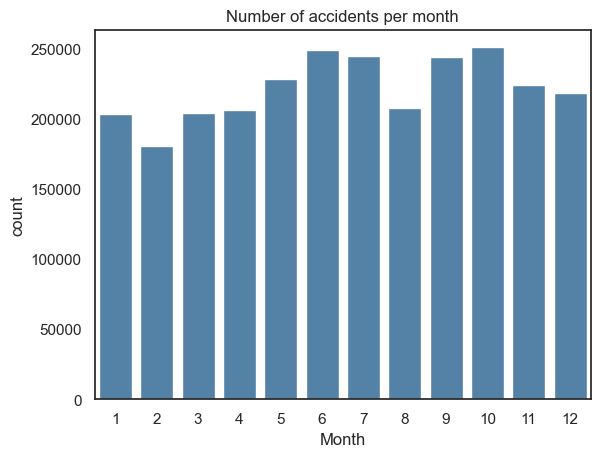

In [21]:
# Per month

sns.countplot(x=df['month'], color='#4682B4')
plt.xlabel('Month')
plt.title('Number of accidents per month')
plt.savefig("../plots/num_acc_per_month.png")

C:\Users\smara\AppData\Local\Temp\ipykernel_12196\3644528818.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_year_month = df.groupby(['year', 'month'])['Num_Acc'].nunique().reset_index()
C:\Users\smara\AppData\Local\Temp\ipykernel_12196\3644528818.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed 

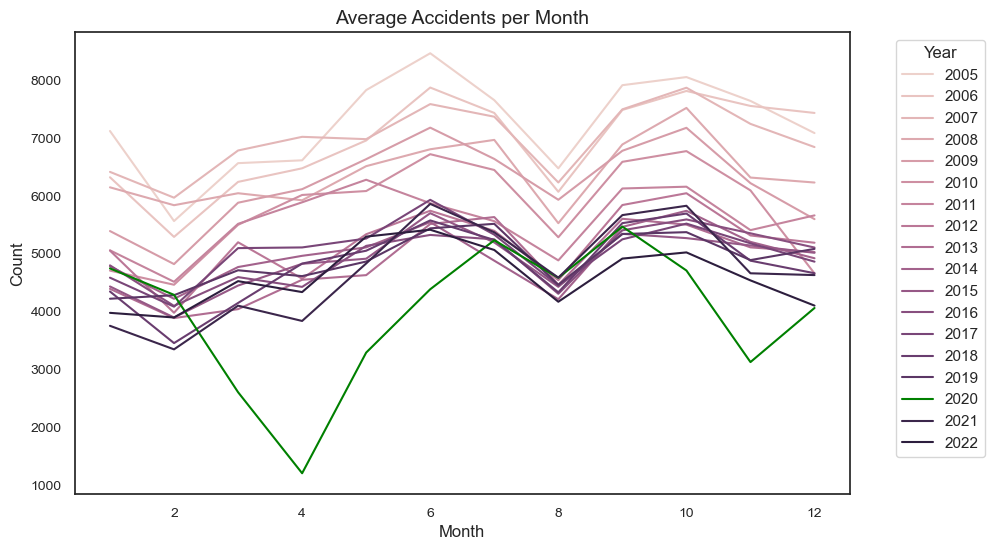

<Figure size 640x480 with 0 Axes>

In [67]:
# Per month, with yearly trends

# Set the order of the months in the DataFrame
months_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# Group by year and month, calculate the number of unique accidents
accidents_per_year_month = df.groupby(['year', 'month'])['Num_Acc'].nunique().reset_index()

# Calculate yearly standard deviation
yearly_std = accidents_per_year_month.groupby('year')['Num_Acc'].std()

# Lineplot for average monthly accidents with different lines for each year and yearly error bars
plt.figure(figsize=(10, 6))

ax = sns.lineplot(
    x='month',
    y='Num_Acc',
    hue='year',
    data=accidents_per_year_month,
    err_style="band",   # Add shaded error bands
    ci=None,            # Do not calculate the default confidence interval
    err_kws={'alpha': 0.2, 'yerr': yearly_std},  # Pass yearly_std for error bars
    sort=False          # To keep the months in the specified order
)

# Set the color for the line corresponding to the year 2020 to green
ax.lines[accidents_per_year_month['year'].unique().tolist().index(2020)].set_color('green')

# Set tick parameters and labels
tx_font = 10  # Adjust the font size as needed
plt.tick_params(axis='both', which='major', labelsize=tx_font)

# Set title and labels
t_font = 14  # Adjust the title font size as needed
xy_font = 12  # Adjust the axis label font size as needed
plt.title("Average Accidents per Month", fontsize=t_font)
plt.xlabel("Month", fontsize=xy_font)
plt.ylabel("Count", fontsize=xy_font)

# Set legend outside the plot to the right
plt.legend(list(years.values()), title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
plt.savefig("../plots/yearly_num_acc_per_month.png")

### __Can we make any correlations with severity?__

The severity variable is per person involved in the accident. Let's try calculating a max-severity per accident.

In [32]:
# Severity is not sorted in a logical way, so we should resort it
#before: 1 = unharmed
#        2 = killed
#        3 = hospitalized
#        4 = minor injury
#
# Severity mapping: replace 2 with 4 and 4 with 2
severity_mapping = {2: 4, 4: 2}

# Apply the mapping to create the 'sev_reordered' column
df['sev_reordered'] = df['severity'].replace(severity_mapping)

# Group by Num_Acc, assign every user in an accident the max severity for that accident
df['acc_max_sev'] = df.groupby('Num_Acc')['sev_reordered'].transform('max')

## Deleting -1 category (just 301 values)
df = df[df['sev_reordered'] != -1]

In [33]:
df['acc_max_sev'] = df['acc_max_sev'].astype(int).astype(str)
df['acc_max_sev'].value_counts()

C:\Users\smara\AppData\Local\Temp\ipykernel_4724\4259731675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acc_max_sev'] = df['acc_max_sev'].astype(int).astype(str)


acc_max_sev
2    1539351
3     970581
4     155295
Name: count, dtype: int64

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


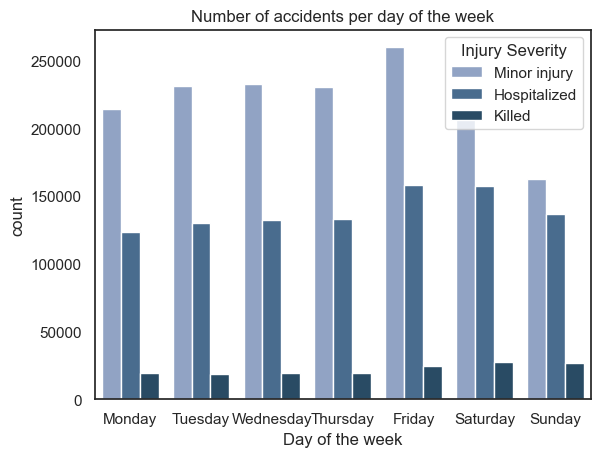

In [45]:
# Define custom colors for the severity levels
severity_palette = {'2': '#88A1CC', '3': '#3E6C99', '4': '#1F4C6E'}
sns.set(style="white")

# Number of accidents grouped by severity per day of the week
ax = sns.countplot(x='weekday_name', 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                   hue='acc_max_sev', hue_order=["2", "3", "4"],
                   palette=severity_palette,  # Set custom palette
                   data=df)

plt.title("Number of accidents per day of the week")
plt.xlabel("Day of the week")
plt.legend(title='Injury Severity', labels=["Minor injury", "Hospitalized", "Killed"])
plt.savefig("../plots/num_acc_per_day_severity.png")

plt.savefig("../plots/num_acc_per_day_severity.png")

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


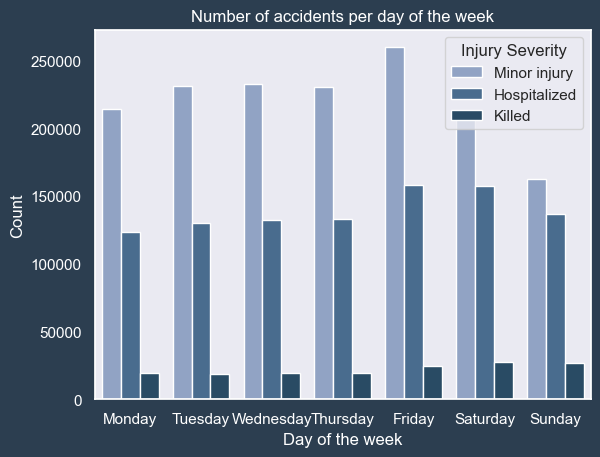

In [49]:
# Set the Seaborn dark style
sns.set(style="dark")

# Create a figure
fig, ax = plt.subplots()

# Define custom colors for the severity levels
severity_palette = {'2': '#88A1CC', '3': '#3E6C99', '4': '#1F4C6E'}

# Number of accidents grouped by severity per day of the week
ax = sns.countplot(x='weekday_name', 
                   order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                   hue='acc_max_sev', hue_order=["2", "3", "4"],
                   palette=severity_palette,  # Set custom palette
                   data=df)

plt.title("Number of accidents per day of the week", color='white')
plt.xlabel("Day of the week", color='white')
plt.ylabel("Count", color='white')
plt.legend(title='Injury Severity', labels=["Minor injury", "Hospitalized", "Killed"])

# Set a dark gray background color for the area with labels and title
fig.patch.set_facecolor('#2c3e50')  

# Set the text color for y-axis ticks
ax.tick_params(axis='both', colors='white')

plt.savefig("../plots/num_acc_per_day_severity_streamlit.png")

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

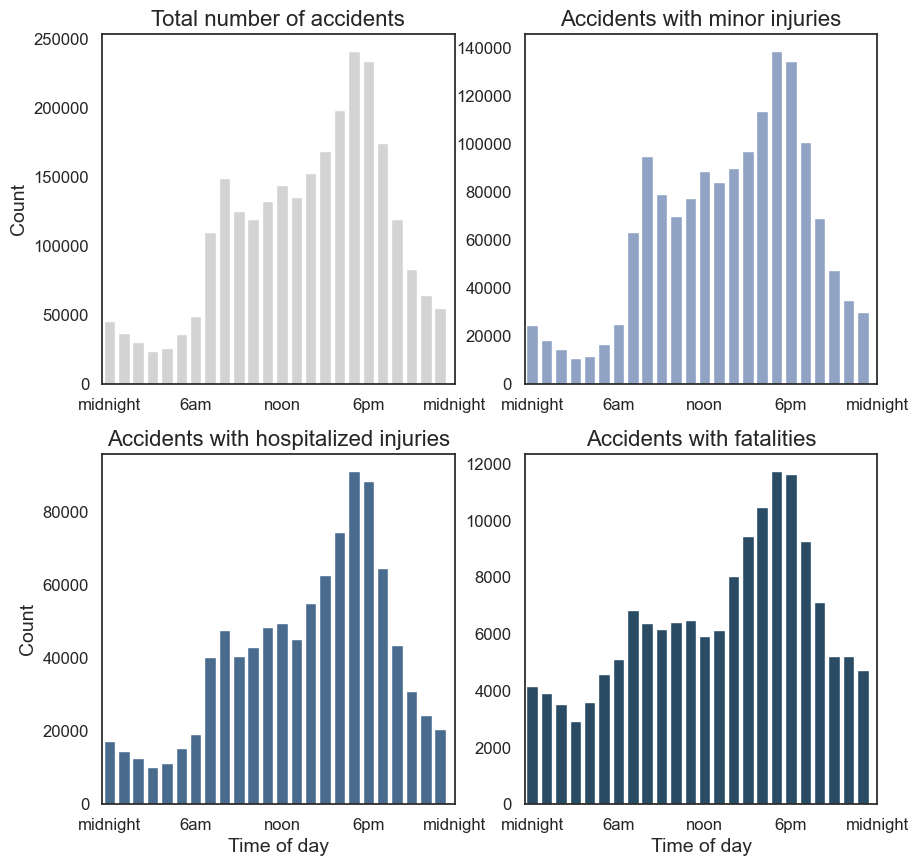

In [70]:
# Number of accidents per hour grouped by severity
sns.set(style="white")

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(x = df['date_time'].dt.hour, color = 'lightgray')
# Modify x-axis tick labels to display hours of the day
plt.xticks([0, 6, 12, 18, 24], ['midnight', '6am', 'noon', '6pm', 'midnight'])
plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.xlabel("", fontsize = xy_font)
plt.ylabel("Count", fontsize = xy_font)
plt.title("Total number of accidents", fontsize = t_font)


plt.subplot(2,2,2)
sns.countplot(x = df[df['acc_max_sev']=='2']['date_time'].dt.hour, color = '#88A1CC')
# Modify x-axis tick labels to display hours of the day
plt.xticks([0, 6, 12, 18, 24], ['midnight', '6am', 'noon', '6pm', 'midnight'])
plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.xlabel("", fontsize = xy_font)
plt.ylabel("", fontsize = xy_font)
plt.title("Accidents with minor injuries", fontsize = t_font)


plt.subplot(2,2,3)
sns.countplot(x = df[df['acc_max_sev']=='3']['date_time'].dt.hour, color = '#3E6C99')
# Modify x-axis tick labels to display hours of the day
plt.xticks([0, 6, 12, 18, 24], ['midnight', '6am', 'noon', '6pm', 'midnight'])
plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.xlabel("Time of day", fontsize = xy_font)
plt.ylabel("Count", fontsize = xy_font)
plt.title("Accidents with hospitalized injuries", fontsize = t_font)


plt.subplot(2,2,4)
sns.countplot(x = df[df['acc_max_sev']=='4']['date_time'].dt.hour, color = '#1F4C6E')
# Modify x-axis tick labels to display hours of the day
plt.xticks([0, 6, 12, 18, 24], ['midnight', '6am', 'noon', '6pm', 'midnight'])
plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.xlabel("Time of day", fontsize = xy_font)
plt.ylabel("", fontsize = xy_font)
plt.title("Accidents with fatalities", fontsize = t_font)


plt.savefig("../plots/num_acc_per_hour_severity.png")

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


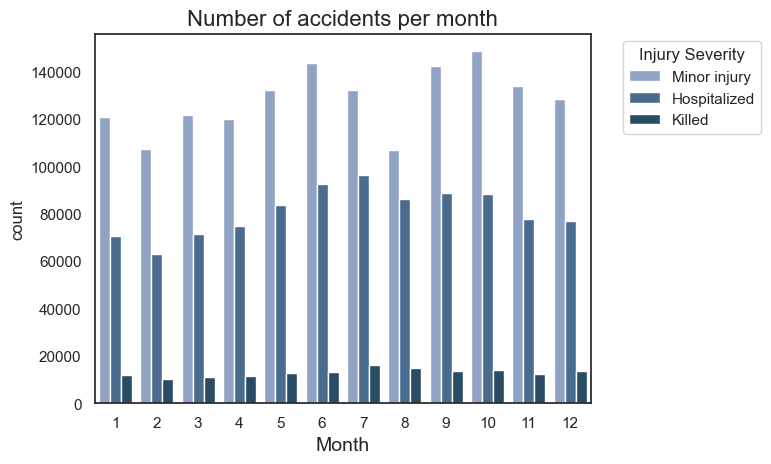

In [54]:
# Number of accidents per month grouped by severity

severity_palette = {'2': '#88A1CC', '3': '#3E6C99', '4': '#1F4C6E'}
sns.set(style="white")

sns.countplot(x='month', hue='acc_max_sev', hue_order = ["2", "3", "4"], palette=severity_palette, data=df)
plt.xlabel('Month', fontsize = xy_font)
plt.title('Number of accidents per month', fontsize = t_font)
plt.legend(title='Injury Severity', labels=["Minor injury", "Hospitalized", "Killed"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("../plots/num_acc_per_month_severity.png")

### __Number of accidents vs. lighting conditions__

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


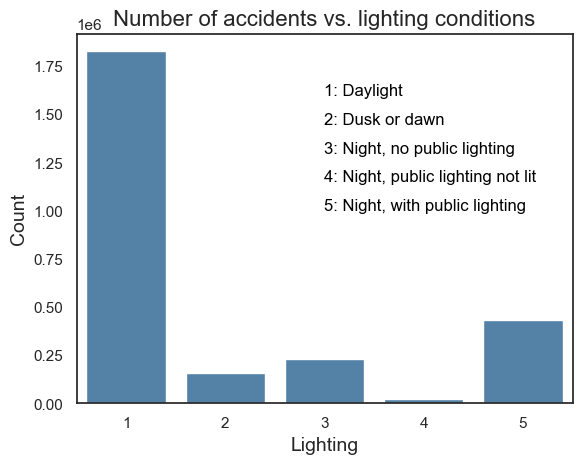

In [63]:
fig = plt.Figure(figsize=(15,15))
sns.countplot(x=df['lighting'], color='#4682B4') 
plt.xlim((0.5,5.5))

plt.title("Number of accidents vs. lighting conditions", fontsize = t_font)

plt.text(3, 1600000, "1: Daylight", horizontalalignment='left', size='medium', color='black')
plt.text(3, 1450000, "2: Dusk or dawn", horizontalalignment='left', size='medium', color='black')
plt.text(3, 1300000, "3: Night, no public lighting", horizontalalignment='left', size='medium', color='black')
plt.text(3, 1150000, "4: Night, public lighting not lit", horizontalalignment='left', size='medium', color='black')
plt.text(3, 1000000, "5: Night, with public lighting", horizontalalignment='left', size='medium', color='black')
plt.xlabel('Lighting', fontsize = xy_font)
plt.ylabel('Count', fontsize = xy_font)
plt.savefig("../plots/num_acc_vs_lighting.png")

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

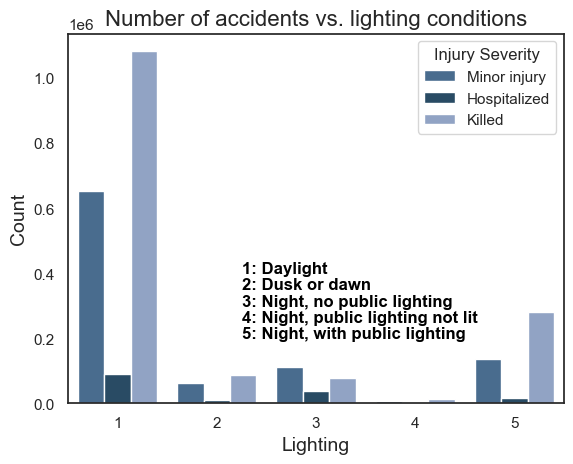

In [62]:
# Grouped by severity

fig = plt.Figure(figsize=(15,15))
severity_palette = {'2': '#88A1CC', '3': '#3E6C99', '4': '#1F4C6E'}
sns.countplot(x='lighting', hue='acc_max_sev', palette = severity_palette, data=df) 
plt.xlim((0.5,5.5))

plt.title("Number of accidents vs. lighting conditions", fontsize = t_font)

plt.text(2.25, 400000, "1: Daylight", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(2.25, 350000, "2: Dusk or dawn", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(2.25, 300000, "3: Night, no public lighting", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(2.25, 250000, "4: Night, public lighting not lit", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(2.25, 200000, "5: Night, with public lighting", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.legend(title='Injury Severity', labels=["Minor injury", "Hospitalized", "Killed"])
plt.xlabel('Lighting', fontsize = xy_font)
plt.ylabel('Count', fontsize = xy_font)
plt.savefig("../plots/num_acc_vs_lighting_severity.png")

### __Accidents by gender__

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


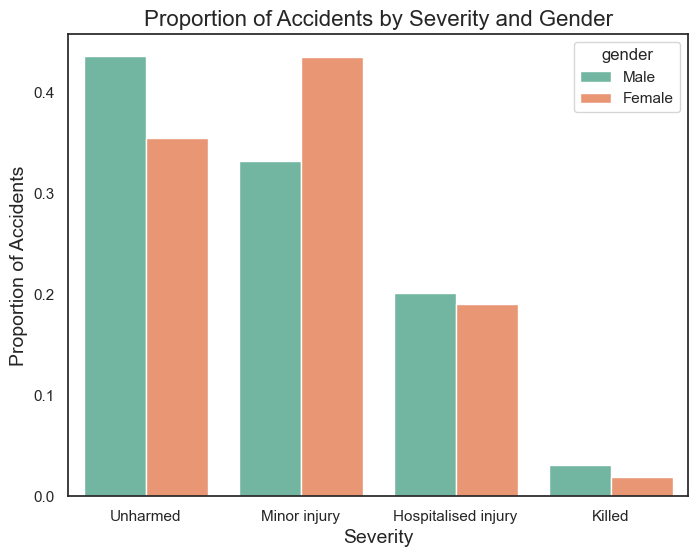

In [64]:
# Cleaning category -1 from gender variable and severity
df = df[df['gender'] != -1]

# Count the number of accidents by 'severity' and 'gender'
severity_gender_counts = df.groupby(['sev_reordered', 'gender']).size().reset_index(name='accident_count')

# Dictionary to map old values to new values
severity_mapping = {
    1: 'Unharmed',
    2: 'Minor injury',
    3: 'Hospitalised injury',
    4: 'Killed'
}

# Dictionary to map old values to new values
sex_mapping = {
    1: 'Male',
    2: 'Female',
}

# Replace column entries with their names
severity_gender_counts['sev_reordered'] = severity_gender_counts['sev_reordered'].replace(severity_mapping)
severity_gender_counts['gender']   = severity_gender_counts['gender'].replace(sex_mapping)

# Calculate the total number of accidents for each gender
gender_counts = severity_gender_counts.groupby('gender')['accident_count'].sum()

# Calculate proportions of each severity level within each gender group
severity_gender_counts['proportion'] = severity_gender_counts.apply(lambda row: row['accident_count'] / gender_counts[row['gender']], axis=1)

severity_gender_counts = severity_gender_counts[severity_gender_counts['gender'] != 'Unknown']

# Define the order of severity levels
severity_order = ['Unharmed', 'Minor injury', 'Hospitalised injury', 'Killed']

# Create a bar plot normalized by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sev_reordered', y='proportion', hue='gender', data=severity_gender_counts, palette='Set2',
           order=severity_order)
plt.title('Proportion of Accidents by Severity and Gender', fontsize = t_font)
plt.xlabel('Severity', fontsize = xy_font)
plt.ylabel('Proportion of Accidents', fontsize = xy_font)

plt.savefig('../plots/severity_by_gender.png', bbox_inches='tight', dpi = 150)

### __Accidents by user type__

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

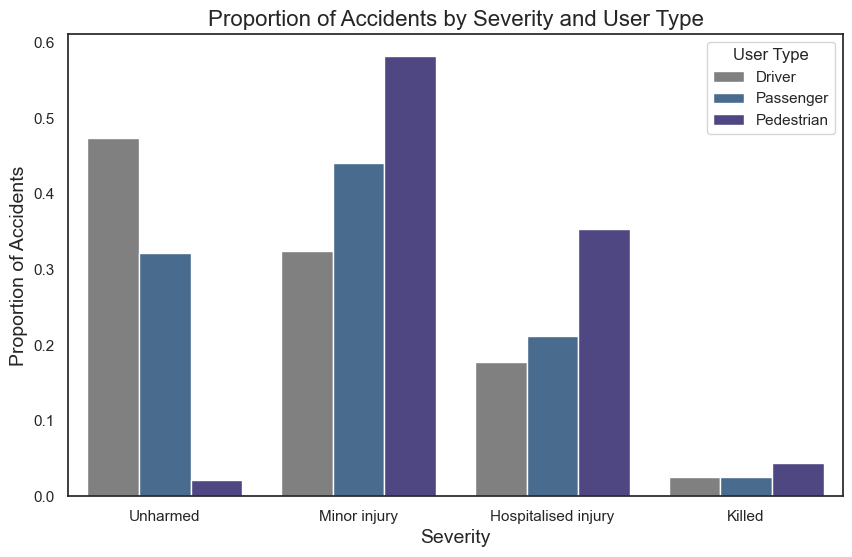

In [76]:
# Define custom labels for x-axis and legend
severity_labels = ['Unharmed', 'Minor injury', 'Hospitalised injury', 'Killed']
catu_labels = ['Driver', 'Passenger', 'Pedestrian']

# Calculate the total number of accidents for each user type
user_type_counts = df.groupby('catu')['sev_reordered'].count()

# Calculate proportions of each severity level within each user type group
normalized_data = df.groupby(['catu', 'sev_reordered']).size().reset_index(name='accident_count')
normalized_data['proportion'] = normalized_data.apply(lambda row: row['accident_count'] / user_type_counts[row['catu']], axis=1)
normalized_data = normalized_data[normalized_data['catu'] != 4]
normalized_data['catu'] = normalized_data['catu'].replace({1.0: 'Driver', 2.0: 'Passenger', 3.0: 'Pedestrian'})

# Define the order of severity levels
severity_order = [1, 2, 3, 4]
catu_palette = {'Driver': 'gray', 'Passenger': '#3E6C99', 'Pedestrian': '#483D8B'}

# Set the style of the visualization
sns.set(style="white")

# Create a countplot with normalized data
plt.figure(figsize=(10, 6))
sns.barplot(data=normalized_data, x='sev_reordered', y='proportion', hue='catu', palette=catu_palette)#, order=severity_order)

# Set custom x-axis labels and legend labels
plt.xlabel('Severity', fontsize = xy_font)
plt.ylabel('Proportion of Accidents', fontsize = xy_font)
plt.title('Proportion of Accidents by Severity and User Type', fontsize = t_font)
plt.xticks(ticks=range(4), labels=severity_labels)  # Set custom x-axis labels
plt.legend(title='User Type')  # Set custom legend labels

# Show the plot
plt.savefig('../plots/severity_by_user.png',bbox_inches='tight', dpi = 150)

### __Accidents by age group__

In [ ]:
# Define the age group bins and labels
age_bins = [18, 26, 36, 56, 66, 81]  # Define the bin edges
age_labels = ['18-25', '26-35', '36-55', '56-65', '66-80']  # Labels for age groups

# Create the 'age_group' variable using pd.cut()
df['age'] = 2023 - df['birth_year']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Create a new DataFrames splitting between drivers, passengers and pedestrians
drivers     = df[df['catu'] == 1]
passengers  = df[df['catu'] == 2]
pedestrians = df[df['catu'] == 3]

def norm_data(dataframe):
    new_data = dataframe
    new_data['sev_reordered'] = new_data['sev_reordered'].replace(severity_mapping)
    return new_data.groupby(['age_group', 'sev_reordered']).size().unstack().div(new_data.groupby('age_group').size(), axis=0)
    #return new_data.groupby(['age_group', 'severity']).size().unstack()
    
# Calculate the proportions of each severity level within each age group
normalized_data_driv = norm_data(drivers)
normalized_data_pass = norm_data(passengers)
normalized_data_peds = norm_data(pedestrians)

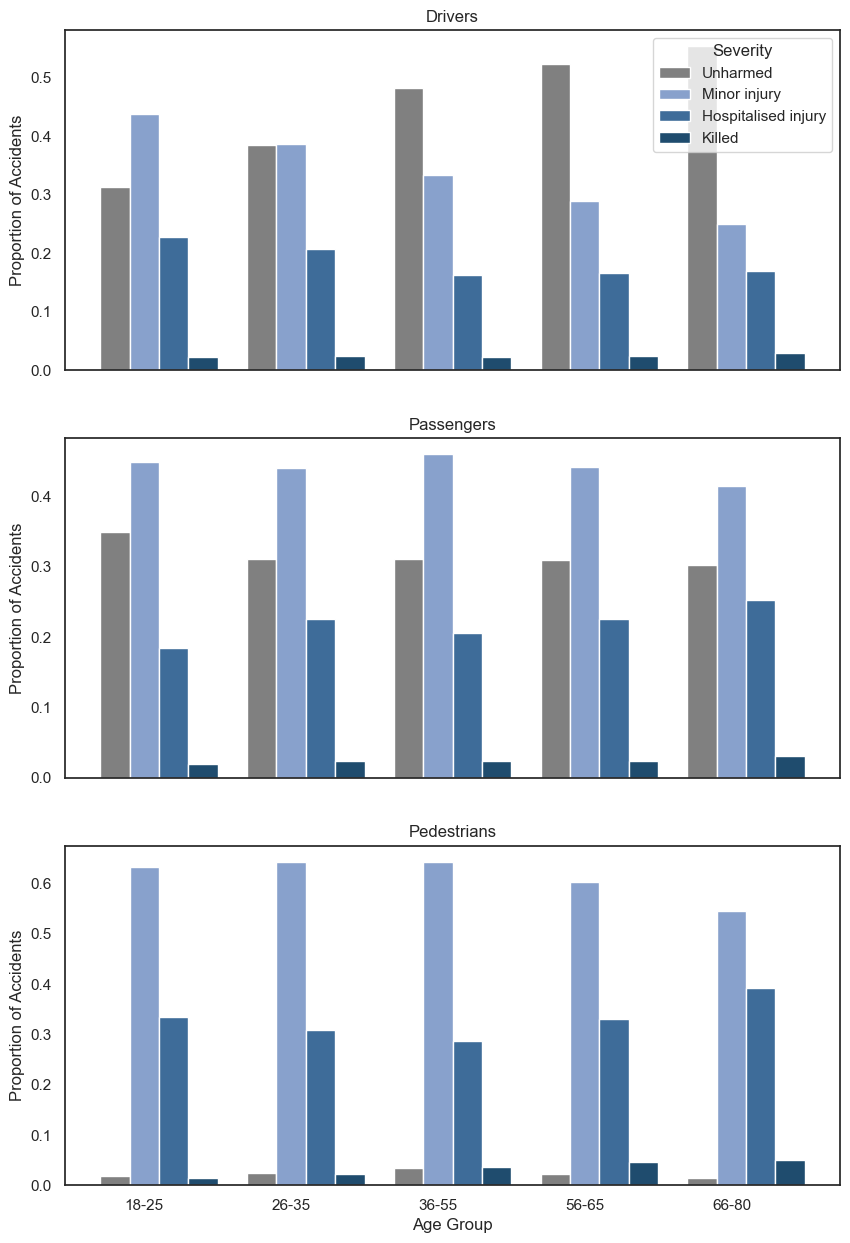

In [123]:
# Create a normalized bar plot

# Set the Seaborn dark style
sns.set(style="white")

fig, ax = plt.subplots(3,1,figsize=(10, 15),sharex=True)
ax = ax.ravel()

# Define severity categories and corresponding colors
severity_categories = ['Unharmed', 'Minor injury', 'Hospitalised injury', 'Killed']
severity_palette = ['gray', '#88A1CC', '#3E6C99', '#1F4C6E']

# Create a bar width
bar_width = 0.2

# Get unique age_group values
age_groups = normalized_data_driv.index

# Drivers
for i, category in enumerate(severity_categories):
    positions = np.arange(len(age_groups)) + (bar_width * i)
    ax[0].bar(positions, normalized_data_driv[category], color=severity_palette[i], width=bar_width, label=category)

# Passengers
age_groups = normalized_data_pass.index

for i, category in enumerate(severity_categories):
    positions = np.arange(len(age_groups)) + (bar_width * i)
    ax[1].bar(positions, normalized_data_pass[category], color=severity_palette[i], width=bar_width, label=category)
    
# Pedestrians
age_groups = normalized_data_peds.index

for i, category in enumerate(severity_categories):
    positions = np.arange(len(age_groups)) + (bar_width * i)
    ax[2].bar(positions, normalized_data_peds[category], color=severity_palette[i], width=bar_width, label=category)

ax[0].set_title('Drivers'); ax[1].set_title('Passengers'); ax[2].set_title('Pedestrians')
ax[0].set_xlabel(''); ax[1].set_xlabel(''); ax[2].set_xlabel('Age Group')
ax[0].set_ylabel('Proportion of Accidents'); ax[1].set_ylabel('Proportion of Accidents'); ax[2].set_ylabel('Proportion of Accidents')
ax[2].set_xticks(np.arange(len(age_groups)) + bar_width)
ax[2].set_xticklabels(age_groups)
ax[0].legend(title='Severity')

plt.savefig('../plots/severity_by_age-groups.png',bbox_inches='tight', dpi = 150)

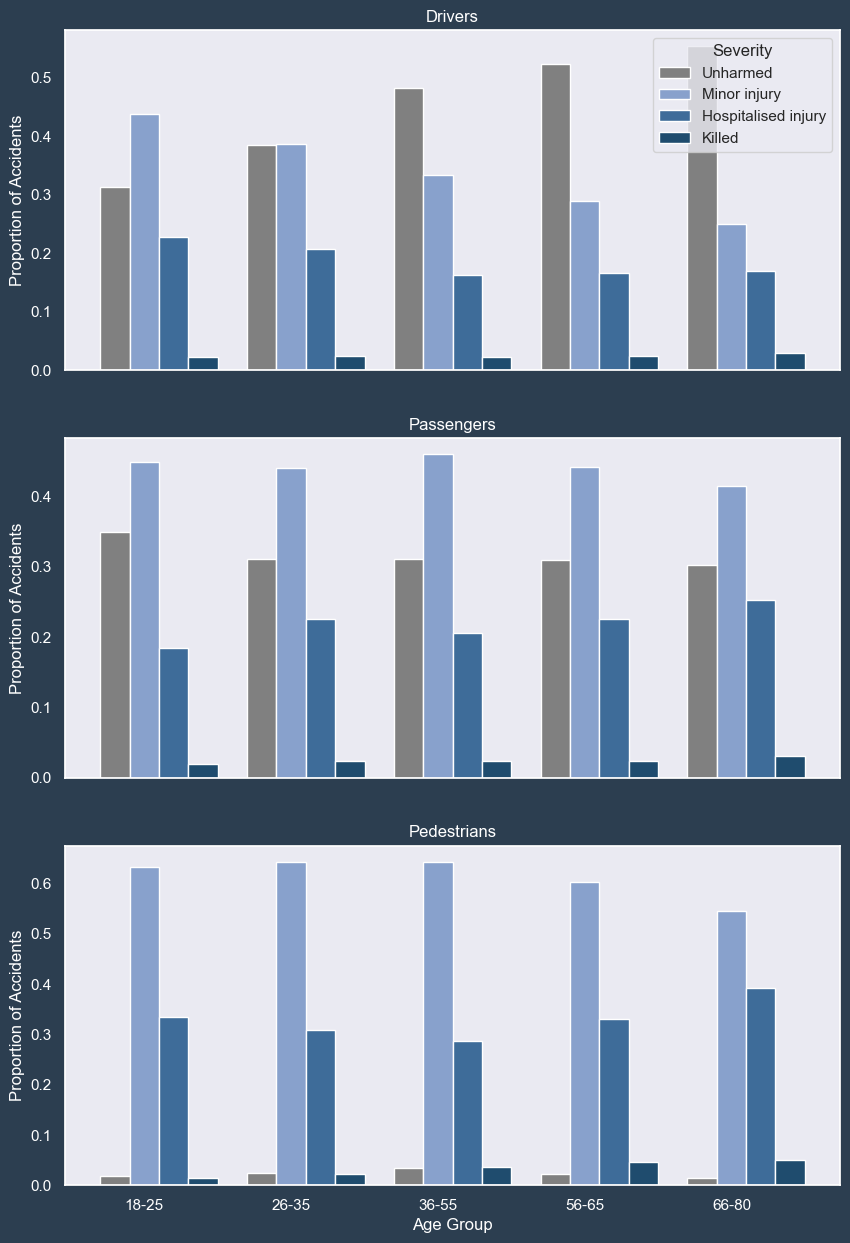

In [125]:
# Create a normalized bar plot - formatted for the Streamlit presentation

# Set the Seaborn dark style
sns.set(style="dark")

# Create a figure
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
ax = ax.ravel()

# Define severity categories and corresponding colors
severity_categories = ['Unharmed', 'Minor injury', 'Hospitalised injury', 'Killed']
severity_palette = ['gray', '#88A1CC', '#3E6C99', '#1F4C6E']

# Create a bar width
bar_width = 0.2

# Get unique age_group values
age_groups = normalized_data_driv.index

# Data for each group
data_sets = [normalized_data_driv, normalized_data_pass, normalized_data_peds]

# Plotting
for i, subplot in enumerate(ax):
    age_groups = data_sets[i].index
    for j, category in enumerate(severity_categories):
        positions = np.arange(len(age_groups)) + (bar_width * j)
        subplot.bar(positions, data_sets[i][category], color=severity_palette[j], width=bar_width, label=category)

    subplot.set_title(f'{plot_labels[i]}', color='white')
    subplot.set_xlabel(f'{plot_xlabel[i]}', color='white')
    subplot.set_ylabel(f'{plot_ylabel[i]}', color='white')

    # Y-axis ticks labels in white
    subplot.tick_params(axis='y', colors='white')

    # X-axis ticks and labels for the last subplot
    if i == 2:
        subplot.set_xticks(np.arange(len(age_groups)) + bar_width)
        subplot.set_xticklabels(age_groups, color='white')

# Set a dark gray background color for the area with labels and title
fig.patch.set_facecolor('#2c3e50')

# Add legend to the first subplot
ax[0].legend(title='Severity')

plt.savefig('../plots/severity_by_age-groups_streamlit.png',bbox_inches='tight', dpi = 150)

### __Proportion of accidents by place position and injury severity__

<Figure size 1000x600 with 0 Axes>

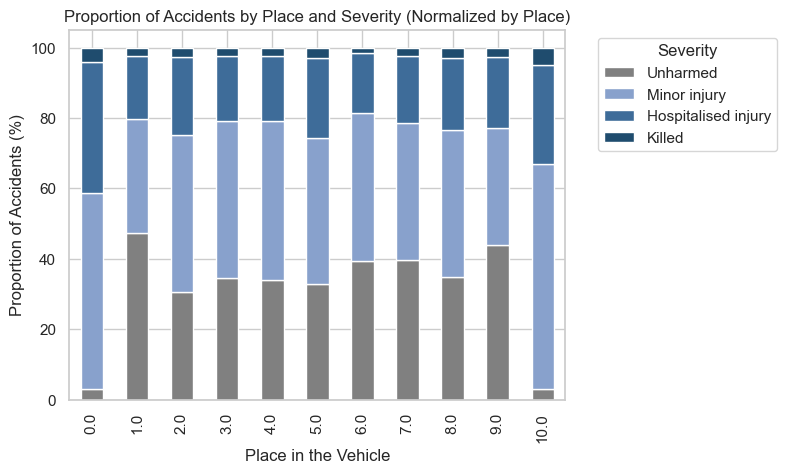

In [92]:
# Eliminating category -1 from place as it does not provide information
df = df[df['place'] != -1]

# Calculate the total number of accidents for each place
total_accidents_by_place = df.groupby('place')['sev_reordered'].count()

# Calculate proportions within each place category
place_severity_counts = df.groupby(['place', 'sev_reordered']).size().unstack(fill_value=0)
proportions = place_severity_counts.divide(total_accidents_by_place, axis=0) * 100

proportions.rename(columns={1: 'Unharmed'}, inplace=True)
proportions.rename(columns={2: 'Minor injury'}, inplace=True)
proportions.rename(columns={3: 'Hospitalised injury'}, inplace=True)
proportions.rename(columns={4: 'Killed'}, inplace=True)

# Set the order of severity levels and the corresponding color codes
severity_order = ['Unharmed', 'Minor injury', 'Hospitalised injury', 'Killed']
severity_palette = ['gray', '#88A1CC', '#3E6C99', '#1F4C6E']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a stacked bar plot normalized by place
plt.figure(figsize=(10, 6))
proportions.loc[:, severity_order].plot(kind='bar', stacked=True, color=severity_palette)

# Set plot labels and title
plt.xlabel('Place in the Vehicle')
plt.ylabel('Proportion of Accidents (%)')
plt.title('Proportion of Accidents by Place and Severity (Normalized by Place)')

# Set legend labels and position
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../plots/place_sev.png',bbox_inches='tight', dpi = 150)

### __Analysis of yearly accidents__

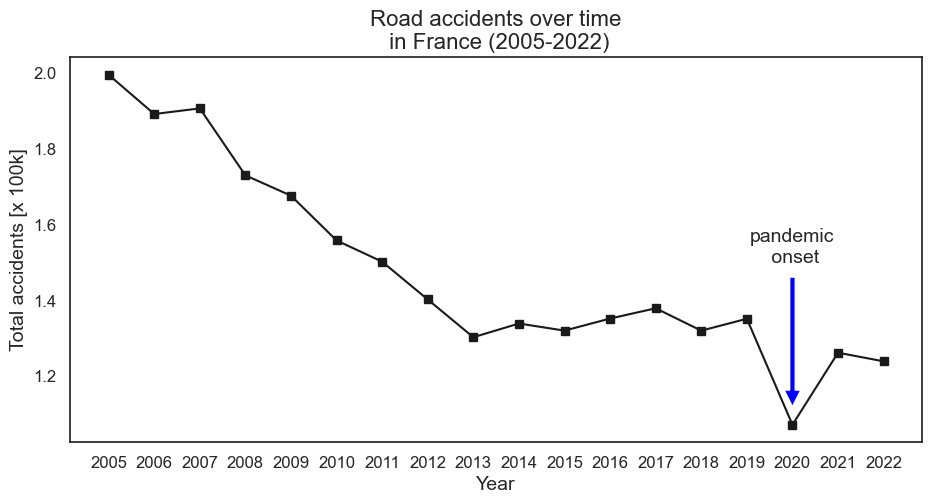

In [94]:
# Number of accidents by year
accidents_years = df[['year', 'Num_Acc']] 
accidents_years = accidents_years.groupby('year').agg({'Num_Acc' : ['count']})

# Set the style of the visualization
sns.set(style="white")

# Plot absolute number of accidents
plt.figure(figsize = [11, 5])
plt.plot(accidents_years.index, accidents_years.iloc[:,0]/100000, "k-s")
plt.annotate('pandemic\n onset', xy=(2020, 1.1), xytext=(2020, 1.5), ha='center',
            arrowprops=dict(facecolor='blue', shrink=0.05), fontsize= 14)
#plt.plot([2020, 2020], [2800,5543], 'b--')
plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.xlabel('Year',fontsize = xy_font)
plt.ylabel('Total accidents [x 100k]', fontsize = xy_font)
plt.title('Road accidents over time\n in France (2005-2022)', fontsize = t_font)
plt.xticks(range(2005,2023), 
          ['2005','2006','2007','2008','2009','2010','2011','2012', 
           '2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022'])
plt.savefig('../plots/total_accident_nr_over_time.png',bbox_inches='tight', dpi = 150)

### __Yearly injuries__

In [95]:
severity_years = df[['sev_reordered', 'year']]
#severity_years['severity'] = severity_years['severity'].astype('str')

unique_values_mapping = {1: 'unharmed',
                         2: 'minor injury',
                         3: 'hospitalized',
                         4: 'killed'}

severity_years['sev_reordered'] = severity_years['sev_reordered'].replace(unique_values_mapping)

#severity_years.info()
severity_years = pd.get_dummies(severity_years)

C:\Users\smara\AppData\Local\Temp\ipykernel_4724\2404917668.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_years['sev_reordered'] = severity_years['sev_reordered'].replace(unique_values_mapping)


In [96]:
severity_years = df[['sev_reordered', 'year']]
#severity_years['severity'] = severity_years['severity'].astype('str')

unique_values_mapping = {1: 'unharmed',
                         2: 'minor injury',
                         3: 'hospitalized',
                         4: 'killed',
                        -1: 'unknown'}

severity_years['sev_reordered'] = severity_years['sev_reordered'].replace(unique_values_mapping)

#severity_years.info()
severity_years = pd.get_dummies(severity_years)
severity_years.columns = ['year', 'hospitalized', 'killed', 'minor injury', 'unharmed']#, 'unknown']
severity_years

functions_to_apply = {#'unknown': 'sum',
                      'unharmed': 'sum',
                      'killed': 'sum',
                      'hospitalized': 'sum',
                      'minor injury': 'sum',
                     }

injuries_by_year = severity_years.groupby('year').agg(functions_to_apply)

#display(injuries_by_year)

C:\Users\smara\AppData\Local\Temp\ipykernel_4724\453520378.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severity_years['sev_reordered'] = severity_years['sev_reordered'].replace(unique_values_mapping)


#### __Percentage injuries (by severity) relative to 2005__

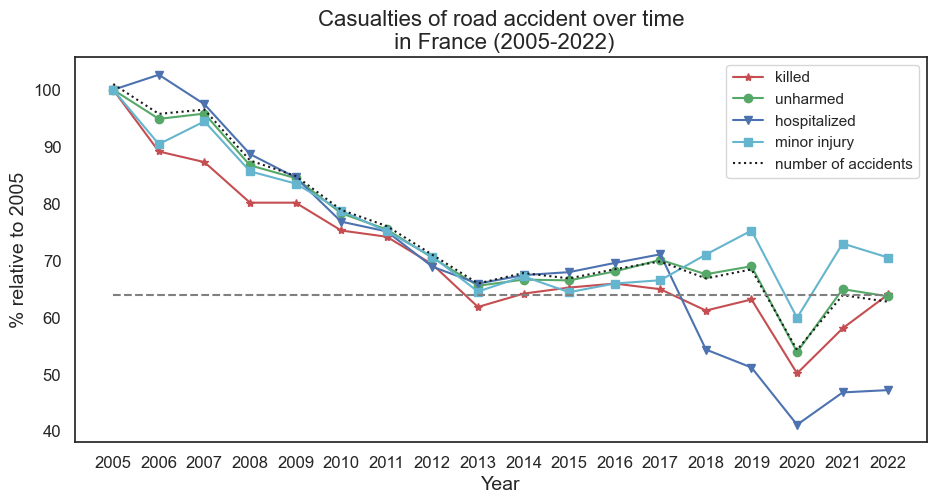

In [97]:
injuries_by_year_norm = injuries_by_year/injuries_by_year.iloc[0,]*100
#display(injuries_by_year_norm)
plt.figure(figsize = [11, 5])
plt.plot(injuries_by_year_norm.index, injuries_by_year_norm.killed, "r-*", 
         injuries_by_year_norm.index, injuries_by_year_norm.unharmed, "g-o", 
         injuries_by_year_norm.index, injuries_by_year_norm.hospitalized, "b-v", 
         injuries_by_year_norm.index, injuries_by_year_norm['minor injury'], "c-s",
         injuries_by_year_norm.index, accidents_years.iloc[:,0]/197498*100, "k:")
plt.plot([2005,2022], [64,64], color = 'gray', linestyle = '--') 

#plt.annotate('pandemic\n onset', xy=(2020, 2800), xytext=(2020, 4500), ha='center',
#            arrowprops=dict(facecolor='black', shrink=0.05), fontsize= 14)
#plt.annotate('?', xy=(2013, 3500), xytext=(2013, 4500), ha='center',
#            arrowprops=dict(facecolor='grey', shrink=0.05), fontsize= 24)
#plt.plot([2020, 2020], [2800,5543], 'b--')
plt.legend(['killed', 'unharmed', 'hospitalized', 'minor injury', 'number of accidents'])
plt.tick_params(axis='both', which='major', labelsize = tx_font)
plt.xlabel('Year',fontsize = xy_font)
plt.ylabel('% relative to 2005', fontsize = xy_font)
plt.title('Casualties of road accident over time\n in France (2005-2022)', fontsize = t_font)
plt.xticks(range(2005,2023), 
          ['2005','2006','2007','2008','2009','2010','2011','2012', 
           '2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022'])
#plt.axvspan(2013, 2017, color='gray', alpha=0.1)
#plt.show()
plt.savefig('../plots/casualties_over_time_2005.png',bbox_inches='tight', dpi = 150)

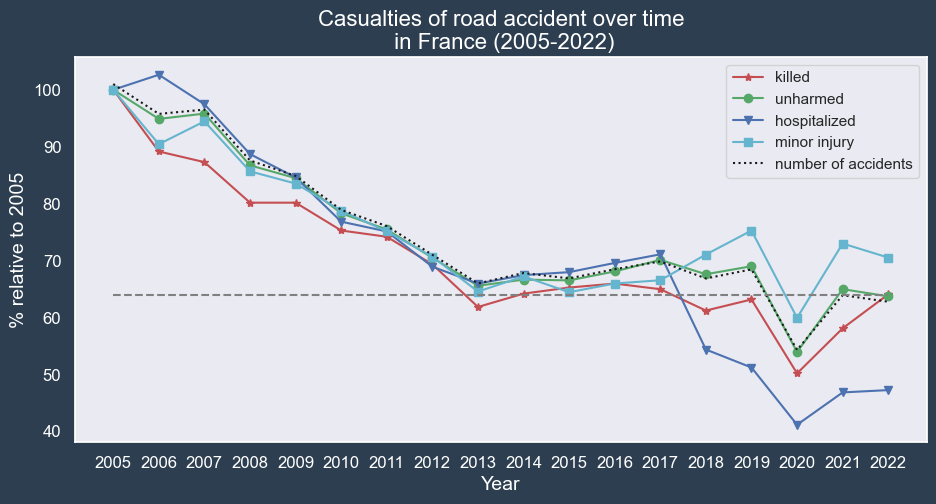

In [101]:
# Plot formatted for the Streamlit presentation
injuries_by_year_norm = injuries_by_year/injuries_by_year.iloc[0,]*100

fig, ax = plt.subplots(figsize = [11, 5])

# Set the Seaborn dark style
sns.set(style="dark")

plt.plot(injuries_by_year_norm.index, injuries_by_year_norm.killed, "r-*", 
         injuries_by_year_norm.index, injuries_by_year_norm.unharmed, "g-o", 
         injuries_by_year_norm.index, injuries_by_year_norm.hospitalized, "b-v", 
         injuries_by_year_norm.index, injuries_by_year_norm['minor injury'], "c-s",
         injuries_by_year_norm.index, accidents_years.iloc[:,0]/197498*100, "k:")
plt.plot([2005,2022], [64,64], color = 'gray', linestyle = '--') 


plt.legend(['killed', 'unharmed', 'hospitalized', 'minor injury', 'number of accidents'])
plt.tick_params(axis='both', which='major', labelsize = tx_font, color = 'white')
plt.xlabel('Year',fontsize = xy_font, color = 'white')
plt.ylabel('% relative to 2005', fontsize = xy_font, color = 'white')
plt.title('Casualties of road accident over time\n in France (2005-2022)', fontsize = t_font, color = 'white')
plt.xticks(range(2005,2023), 
          ['2005','2006','2007','2008','2009','2010','2011','2012', 
           '2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022'])

# Set a dark gray background color for the area with labels and title
fig.patch.set_facecolor('#2c3e50')  

# Set the text color for y-axis ticks
ax.tick_params(axis='both', colors='white')

plt.savefig('../plots/casualties_over_time_2005_streamlit.png',bbox_inches='tight', dpi = 150)

#### __Percentage injuries (by severity) relative to 2022__

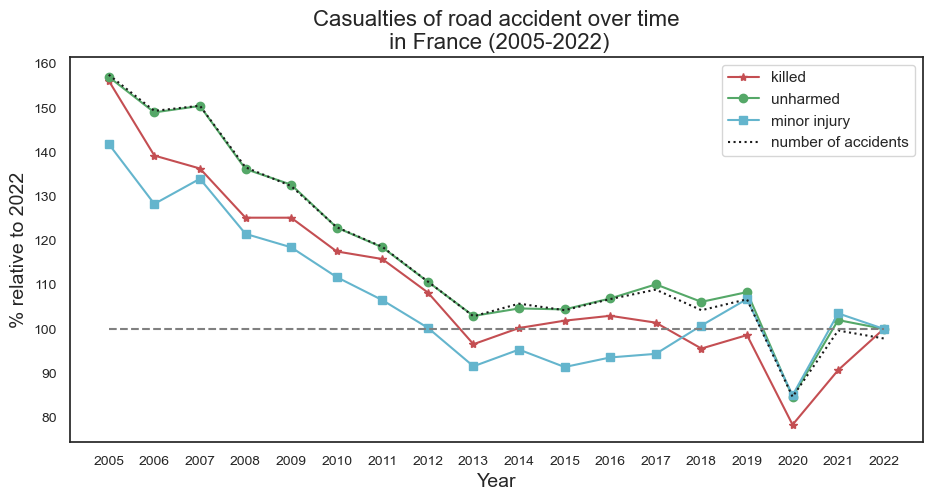

In [61]:
#injuries_by_year_norm = injuries_by_year.drop('unknown', axis = 1)/injuries_by_year.drop('unknown', axis = 1).iloc[17,]*100
injuries_by_year_norm = injuries_by_year/injuries_by_year.iloc[17,]*100
#display(injuries_by_year_norm)
plt.figure(figsize = [11, 5])
plt.plot(injuries_by_year_norm.index, injuries_by_year_norm.killed, "r-*", 
         injuries_by_year_norm.index, injuries_by_year_norm.unharmed, "g-o", 
         #injuries_by_year_norm.index, injuries_by_year_norm.hospitalized, "b-v", 
         injuries_by_year_norm.index, injuries_by_year_norm['minor injury'], "c-s",
         injuries_by_year_norm.index, accidents_years.iloc[:,0]/126662*100, "k:")
plt.plot([2005,2022], [100,100], color = 'gray', linestyle = '--') 
#plt.annotate('pandemic\n onset', xy=(2020, 2800), xytext=(2020, 4500), ha='center',
#            arrowprops=dict(facecolor='black', shrink=0.05), fontsize= 14)
#plt.annotate('?', xy=(2013, 3500), xytext=(2013, 4500), ha='center',
#            arrowprops=dict(facecolor='grey', shrink=0.05), fontsize= 24)
#plt.plot([2020, 2020], [2800,5543], 'b--')
plt.legend(['killed', 'unharmed', #'hospitalized', 
            'minor injury', 'number of accidents'])
plt.tick_params(axis='both', which='major', labelsize = 10)
plt.xlabel('Year',fontsize = 14)
plt.ylabel('% relative to 2022', fontsize = 14)
plt.title('Casualties of road accident over time\n in France (2005-2022)', fontsize = 16)
plt.xticks(range(2005,2023), 
          ['2005','2006','2007','2008','2009','2010','2011','2012', 
           '2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022'])
#plt.show()
plt.savefig('../plots/casualties_over_time_2022.png',bbox_inches='tight', dpi = 150)

#### __Percentage injuries (by severity) relative to number of accidents (that same year)__

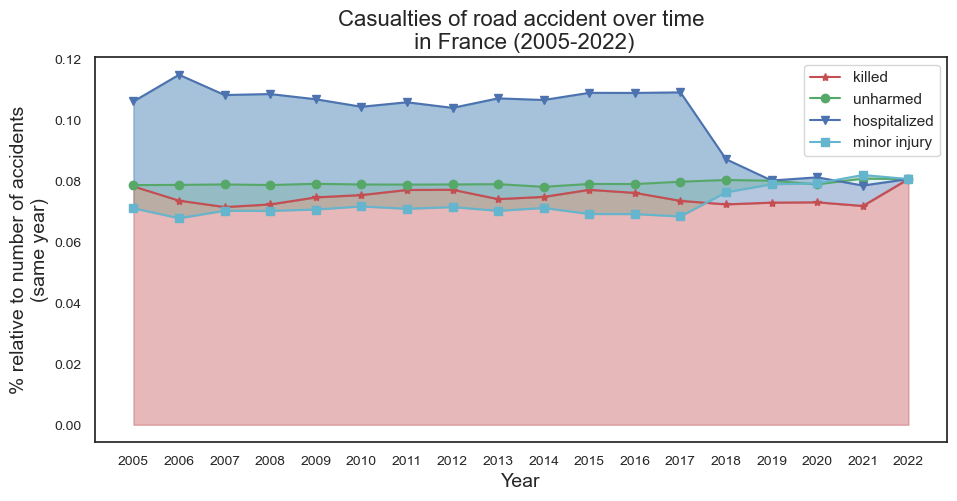

In [62]:
#injuries_by_year_norm = injuries_by_year.drop('unknown', axis = 1)
injuries_by_year_norm = pd.concat([injuries_by_year_norm, accidents_years.iloc[:,0]], axis = 1)

#injuries_by_year_norm.columns
injuries_by_year_norm = injuries_by_year_norm.rename(columns={('Num_Acc', 'count'): "number of accidents"})

#injuries_by_year_norm.iloc[:,4]
injuries_by_year_norm = injuries_by_year_norm.apply(lambda x: x/injuries_by_year_norm.iloc[:,4]*100)

plt.figure(figsize = [11, 5])
plt.plot(injuries_by_year_norm.index, injuries_by_year_norm.killed, "r-*", 
         injuries_by_year_norm.index, injuries_by_year_norm.unharmed, "g-o", 
         injuries_by_year_norm.index, injuries_by_year_norm.hospitalized, "b-v", 
         injuries_by_year_norm.index, injuries_by_year_norm['minor injury'], "c-s")

plt.legend(['killed', 'unharmed', 'hospitalized', 
            'minor injury', 'number of accidents'])
plt.tick_params(axis='both', which='major', labelsize = 10)
plt.xlabel('Year',fontsize = 14)
plt.ylabel('% relative to number of accidents\n(same year)', fontsize = 14)
plt.title('Casualties of road accident over time\n in France (2005-2022)', fontsize = 16)
plt.xticks(range(2005,2023), 
          ['2005','2006','2007','2008','2009','2010','2011','2012', 
           '2013','2014','2015','2016','2017','2018','2019','2020', '2021', '2022'])
plt.fill_between(injuries_by_year_norm.index, 
                 injuries_by_year_norm.killed,injuries_by_year_norm.hospitalized,
                 color='b',alpha=.4)
plt.fill_between(injuries_by_year_norm.index, 
                 injuries_by_year_norm.hospitalized, injuries_by_year_norm['minor injury'],
                 color='c',alpha=.2)
plt.fill_between(injuries_by_year_norm.index, 
                 np.zeros(18), injuries_by_year_norm.killed,
                 color='r',alpha=.4)
plt.fill_between(injuries_by_year_norm.index, 
                 injuries_by_year_norm['minor injury'],injuries_by_year_norm.unharmed,
                 color='g',alpha=.2)
#plt.fill_between(X, Y1,Y3,color='y',alpha=.5)
plt.show()

### __Car user category, by gender__

In [102]:
# Has the women occupancy (in crashed cars) increased since 2005?
# by driver; by passanger

auto_ids= df[df['catv'] == 7]['Num_Acc']
#display(auto_ids)
gender_pos_years = df[df['Num_Acc'].isin(auto_ids)][['gender', 'catu', 'place', 'year']] 
gender_pos_years = gender_pos_years.astype({'catu': 'str', 'place':'str'})
#gender_pos_years.info()

gender_pos_years = pd.get_dummies(gender_pos_years)
#gender_pos_years.head()

gender_pos_years.drop(['place_nan', 'catu_nan'], axis = 1)
gender_years = gender_pos_years.groupby(['year',
                                         'gender']).agg(driver = ('catu_1.0','sum'),
                                                        passenger = ('catu_2.0','sum'),
                                                        pedestrian = ('catu_3.0','sum'),
                                                        front_left = ('place_1.0','sum'),
                                                        front_right = ('place_2.0','sum'),
                                                        back_left = ('place_4.0','sum'),
                                                        back_right = ('place_3.0','sum'),
                                                          ).reset_index()
gender_years = gender_years[gender_years['gender'] != -1]

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

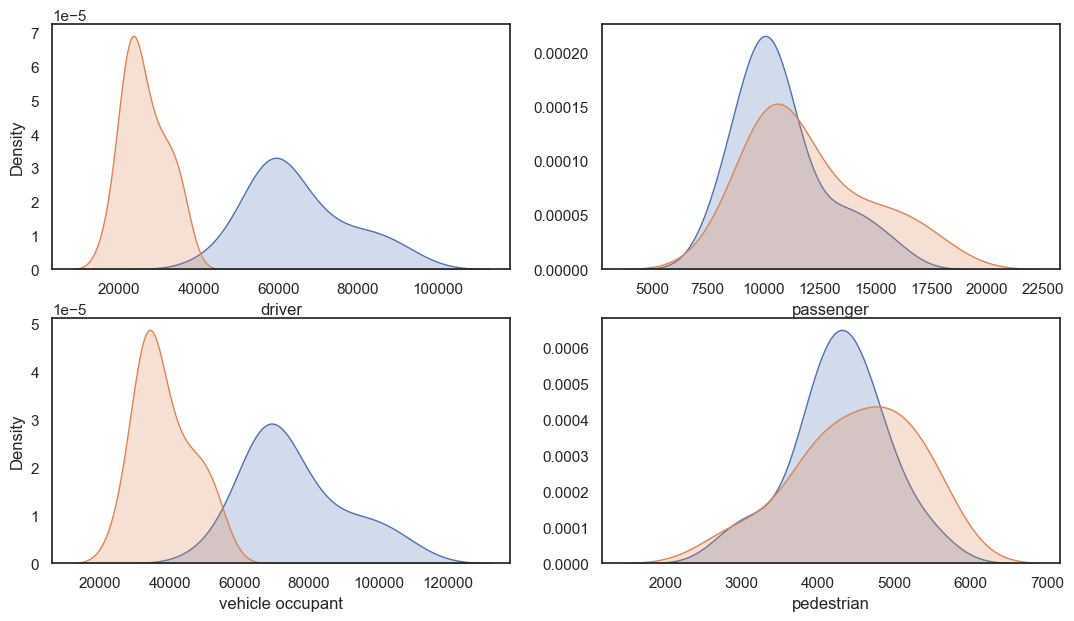

In [110]:
# Male vs female driver 

gender_years['vehicle occupant'] = gender_years['driver'] + gender_years['passenger']

sns.set(style="white")

fig, axes = plt.subplots(2, 2, figsize=(13, 7))


fig = sns.kdeplot(ax=axes[0, 0], data = gender_years[gender_years['gender'] == 1]['driver'], fill=True)
fig = sns.kdeplot(ax=axes[0, 0], data = gender_years[gender_years['gender'] == 2]['driver'], fill=True)

# Male vs female passenger 
fig = sns.kdeplot(ax=axes[0, 1], data = gender_years[gender_years['gender'] == 1]['passenger'], fill=True)
fig = sns.kdeplot(ax=axes[0, 1], data = gender_years[gender_years['gender'] == 2]['passenger'], fill=True)

# Male vs female vehicle occupants 
fig = sns.kdeplot(ax=axes[1, 0], data = gender_years[gender_years['gender'] == 1]['vehicle occupant'], fill=True)
fig = sns.kdeplot(ax=axes[1, 0], data = gender_years[gender_years['gender'] == 2]['vehicle occupant'], fill=True)

# Male vs female pedestrian 
fig = sns.kdeplot(ax=axes[1, 1], data = gender_years[gender_years['gender'] == 1]['pedestrian'], fill=True)
fig = sns.kdeplot(ax=axes[1, 1], data = gender_years[gender_years['gender'] == 2]['pedestrian'], fill=True)

# Remove y-axis label for the 2nd and 4th plots
axes[0, 1].set_ylabel('')
axes[1, 1].set_ylabel('')

plt.savefig('../plots/user_category_in_car_crash_by_gender.png',bbox_inches='tight', dpi = 150)

### __Car seat occupied, by gender__

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

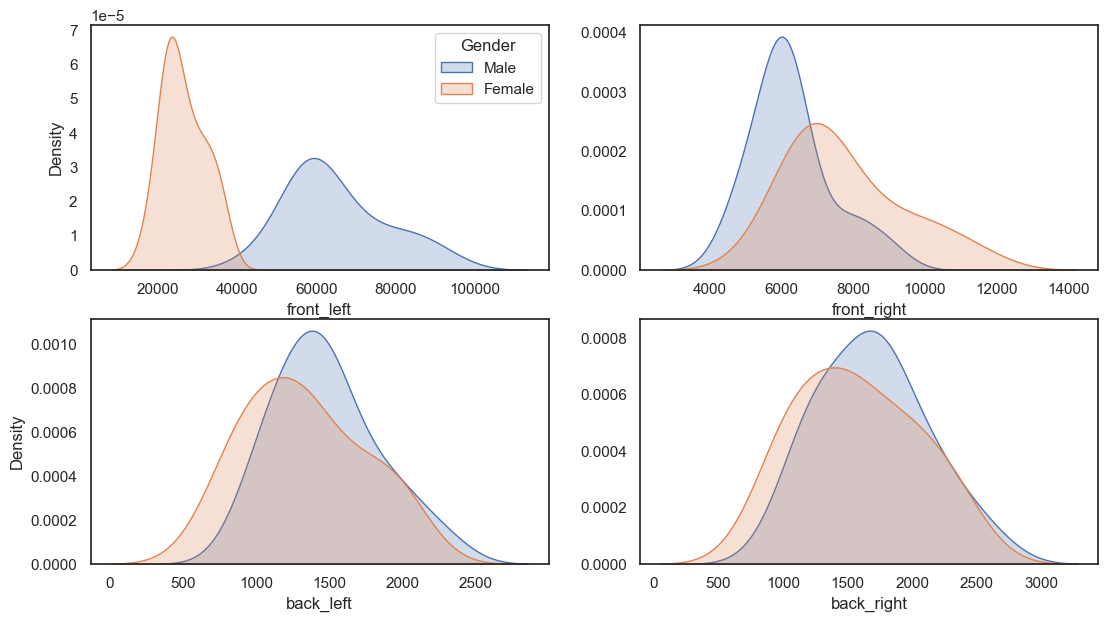

In [118]:
# Male vs female driver 

sns.set(style="white")
fig, axes = plt.subplots(2, 2, figsize=(13, 7))

fig = sns.kdeplot(ax=axes[0, 0], data = gender_years[gender_years['gender'] == 1]['front_left'], fill=True)
fig = sns.kdeplot(ax=axes[0, 0], data = gender_years[gender_years['gender'] == 2]['front_left'], fill=True)

fig = sns.kdeplot(ax=axes[0, 1], data = gender_years[gender_years['gender'] == 1]['front_right'], fill=True)
fig = sns.kdeplot(ax=axes[0, 1], data = gender_years[gender_years['gender'] == 2]['front_right'], fill=True)

fig = sns.kdeplot(ax=axes[1, 0], data = gender_years[gender_years['gender'] == 1]['back_left'], fill=True)
fig = sns.kdeplot(ax=axes[1, 0], data = gender_years[gender_years['gender'] == 2]['back_left'], fill=True)

fig = sns.kdeplot(ax=axes[1, 1], data = gender_years[gender_years['gender'] == 1]['back_right'], fill=True)
fig = sns.kdeplot(ax=axes[1, 1], data = gender_years[gender_years['gender'] == 2]['back_right'], fill=True)

# Remove y-axis label for the 2nd and 4th plots
axes[0, 1].set_ylabel('')
axes[1, 1].set_ylabel('')

legend = axes[0, 0].legend(labels=['Male', 'Female'], title='Gender', loc='upper right')

plt.savefig('../plots/position_in_car_crash_by_gender.png',bbox_inches='tight', dpi = 150)

C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\smara\anaconda3\envs\acc_win\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

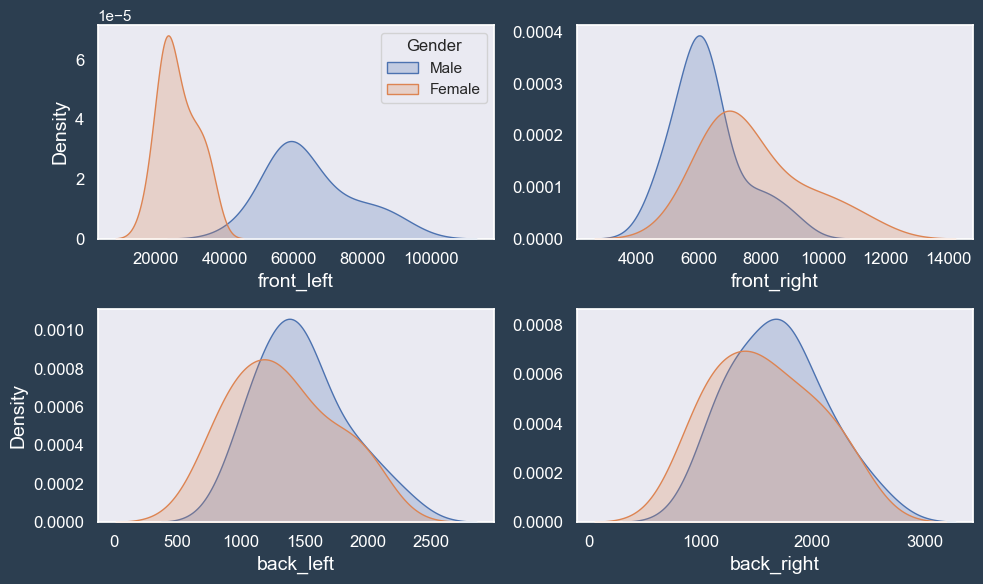

In [132]:
# Male vs female driver - plot formatted for the Streamlit presentation

# Set the dark theme for seaborn
sns.set(style="dark")

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Male vs female front_left
sns.kdeplot(ax=axes[0, 0], data=gender_years[gender_years['gender'] == 1]['front_left'], fill=True)
sns.kdeplot(ax=axes[0, 0], data=gender_years[gender_years['gender'] == 2]['front_left'], fill=True)

# Male vs female front_right
sns.kdeplot(ax=axes[0, 1], data=gender_years[gender_years['gender'] == 1]['front_right'], fill=True)
sns.kdeplot(ax=axes[0, 1], data=gender_years[gender_years['gender'] == 2]['front_right'], fill=True)

# Male vs female back_left
sns.kdeplot(ax=axes[1, 0], data=gender_years[gender_years['gender'] == 1]['back_left'], fill=True)
sns.kdeplot(ax=axes[1, 0], data=gender_years[gender_years['gender'] == 2]['back_left'], fill=True)

# Male vs female back_right
sns.kdeplot(ax=axes[1, 1], data=gender_years[gender_years['gender'] == 1]['back_right'], fill=True)
sns.kdeplot(ax=axes[1, 1], data=gender_years[gender_years['gender'] == 2]['back_right'], fill=True)

# Remove y-axis label for the 2nd and 4th plots
axes[0, 1].set_ylabel('')
axes[1, 1].set_ylabel('')

# Set a dark gray background color for the area with labels and title
fig.patch.set_facecolor('#2c3e50')  

# Set the text color for y-axis ticks
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), color='white', fontsize=xy_font)
    ax.set_ylabel(ax.get_ylabel(), color='white', fontsize=xy_font)
    ax.title.set_color('white')
    ax.title.set_fontsize(t_font) 
    ax.tick_params(axis='both', colors='white', labelsize = tx_font)
    
legend = axes[0, 0].legend(labels=['Male', 'Female'], title='Gender', loc='upper right')

plt.tight_layout()

plt.savefig('../plots/position_in_car_crash_by_gender_streamlit.png',bbox_inches='tight', dpi = 150)